In [64]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('bmh')
%matplotlib inline

pd.options.display.max_rows = 14

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
sns.set(style="ticks")


**Description:**
 * Titanic dataset describes the survival status of individual passengers on the Titanic.
 * passengerID
    * survived -- Survival (0 = No; 1 = Yes)
    * Pclass -- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    * name -- name of the passenger
    * sex -- Sex
    * age -- Age
    * sibsp -- Number of Siblings/Spouses Aboard
    * parch -- Number of Parents/Children Aboard
    * Ticket -- Ticket number
    * fare -- Passenger Fare (British pound)
    * cabin -- cabin
    * embarked -- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
# loading the dataset from the csv file
titanic = pd.read_csv('train.csv')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# Explore the data

In [72]:
titanic.shape

# dataset contains 891 rows and 12 columns

(891, 12)

In [73]:
# cheking null values

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [74]:
# columns having null values are age,Cabin,Embarked

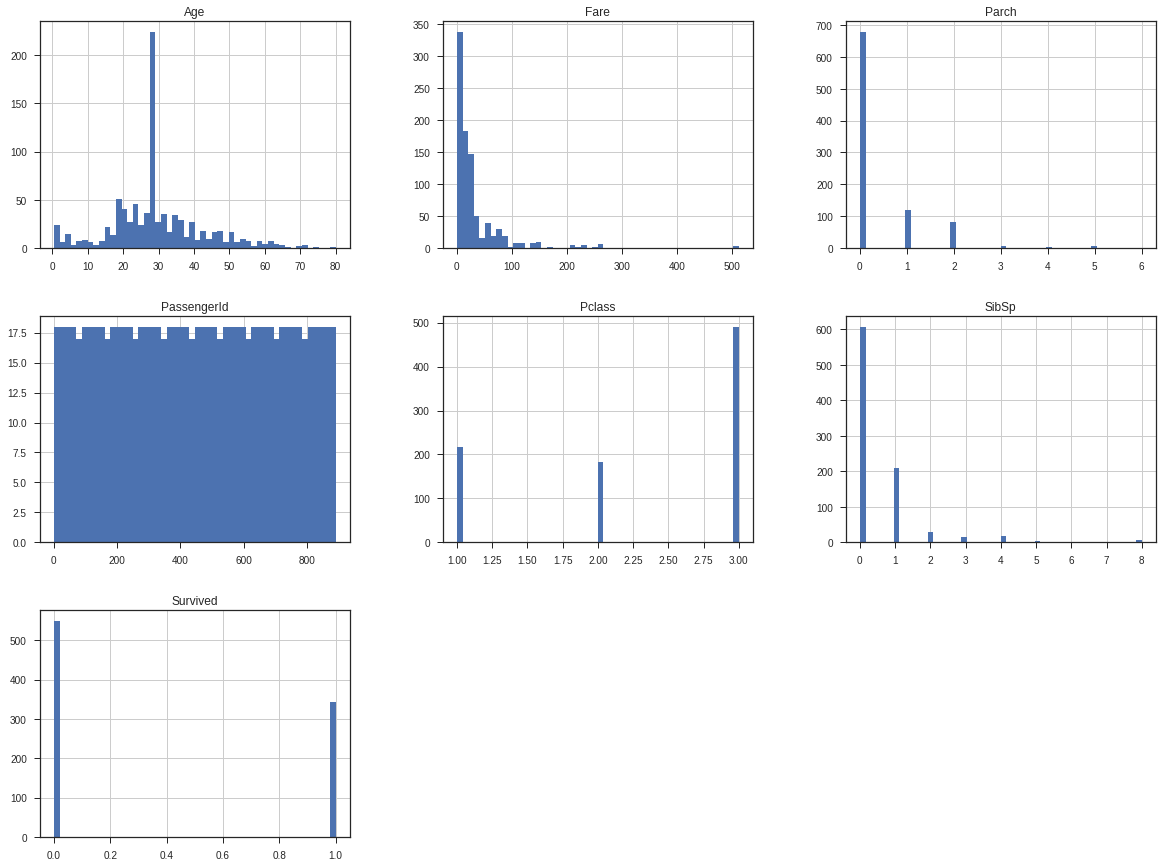

In [75]:
# checking the distributions of the columns

x = titanic.hist(bins=50, figsize=(20, 15))
plt.show()

# filling the nans with the values

In [76]:
median=titanic['Age'].median()
titanic['Age'].fillna(median,inplace=True)

In [77]:
titanic.describe(include=['object'])

Name   Sex  Ticket    Cabin Embarked
count                         891   891     891      204      891
unique                        891     2     681      147        4
top     Sundman, Mr. Johan Julian  male  347082  B96 B98        S
freq                            1   577       7        4      644

In [78]:
titanic['Embarked'].fillna('s',inplace=True)

In [79]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [69]:
titanic1=titanic.drop(['Name','Cabin','Ticket'], axis=1)

# Cabin column is droped because it has 689 nulls
# Name and Ticket columns are droped because they doesnt show any effect on the target

In [15]:
titanic1.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S

# Seabornplots

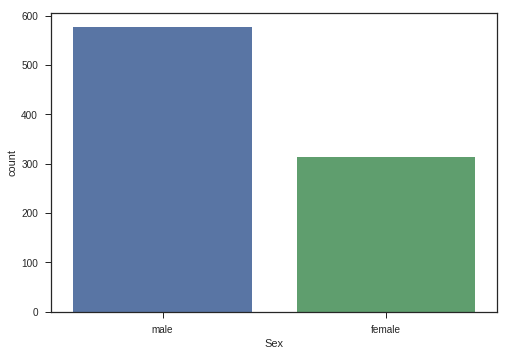

In [16]:
x= sns.countplot(x="Sex",data=titanic)

# in this plot we count no of male and female present in the boat

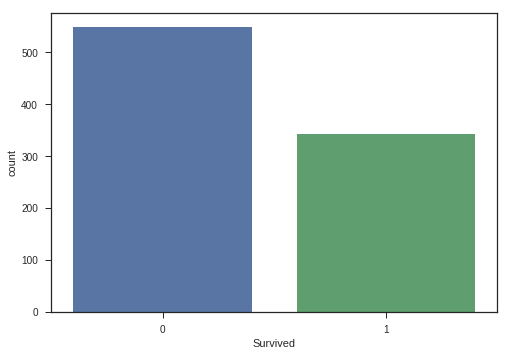

In [17]:
x= sns.countplot(x="Survived",data=titanic)

In [83]:
# this plot represents that no of people are alive and no of people are died

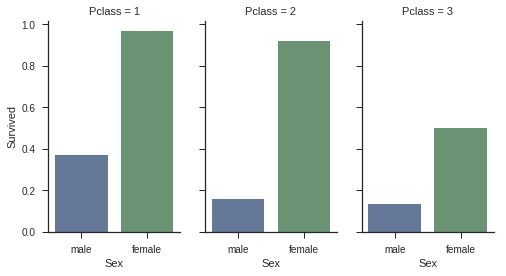

In [84]:
g = sns.factorplot(x="Sex", y="Survived", col="Pclass",
                    data=titanic, saturation=.5,ci=None,
                    kind="bar", aspect=.6)

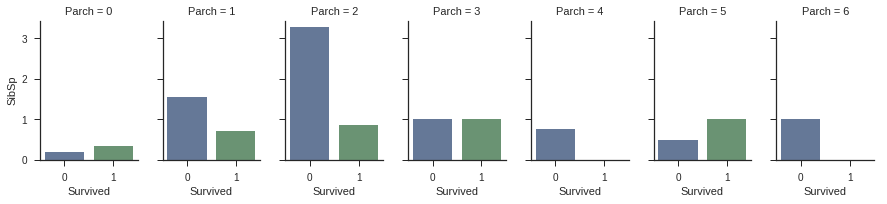

In [21]:
g = sns.factorplot(x="Survived", y="SibSp", col="Parch",
                    data=titanic, saturation=.5,ci=None,
                    kind="bar", aspect=.6,size=3)

In [22]:
# in this plot we find the survival of the people based on Sibsp(siblings/spouse) and parch(parents/children)

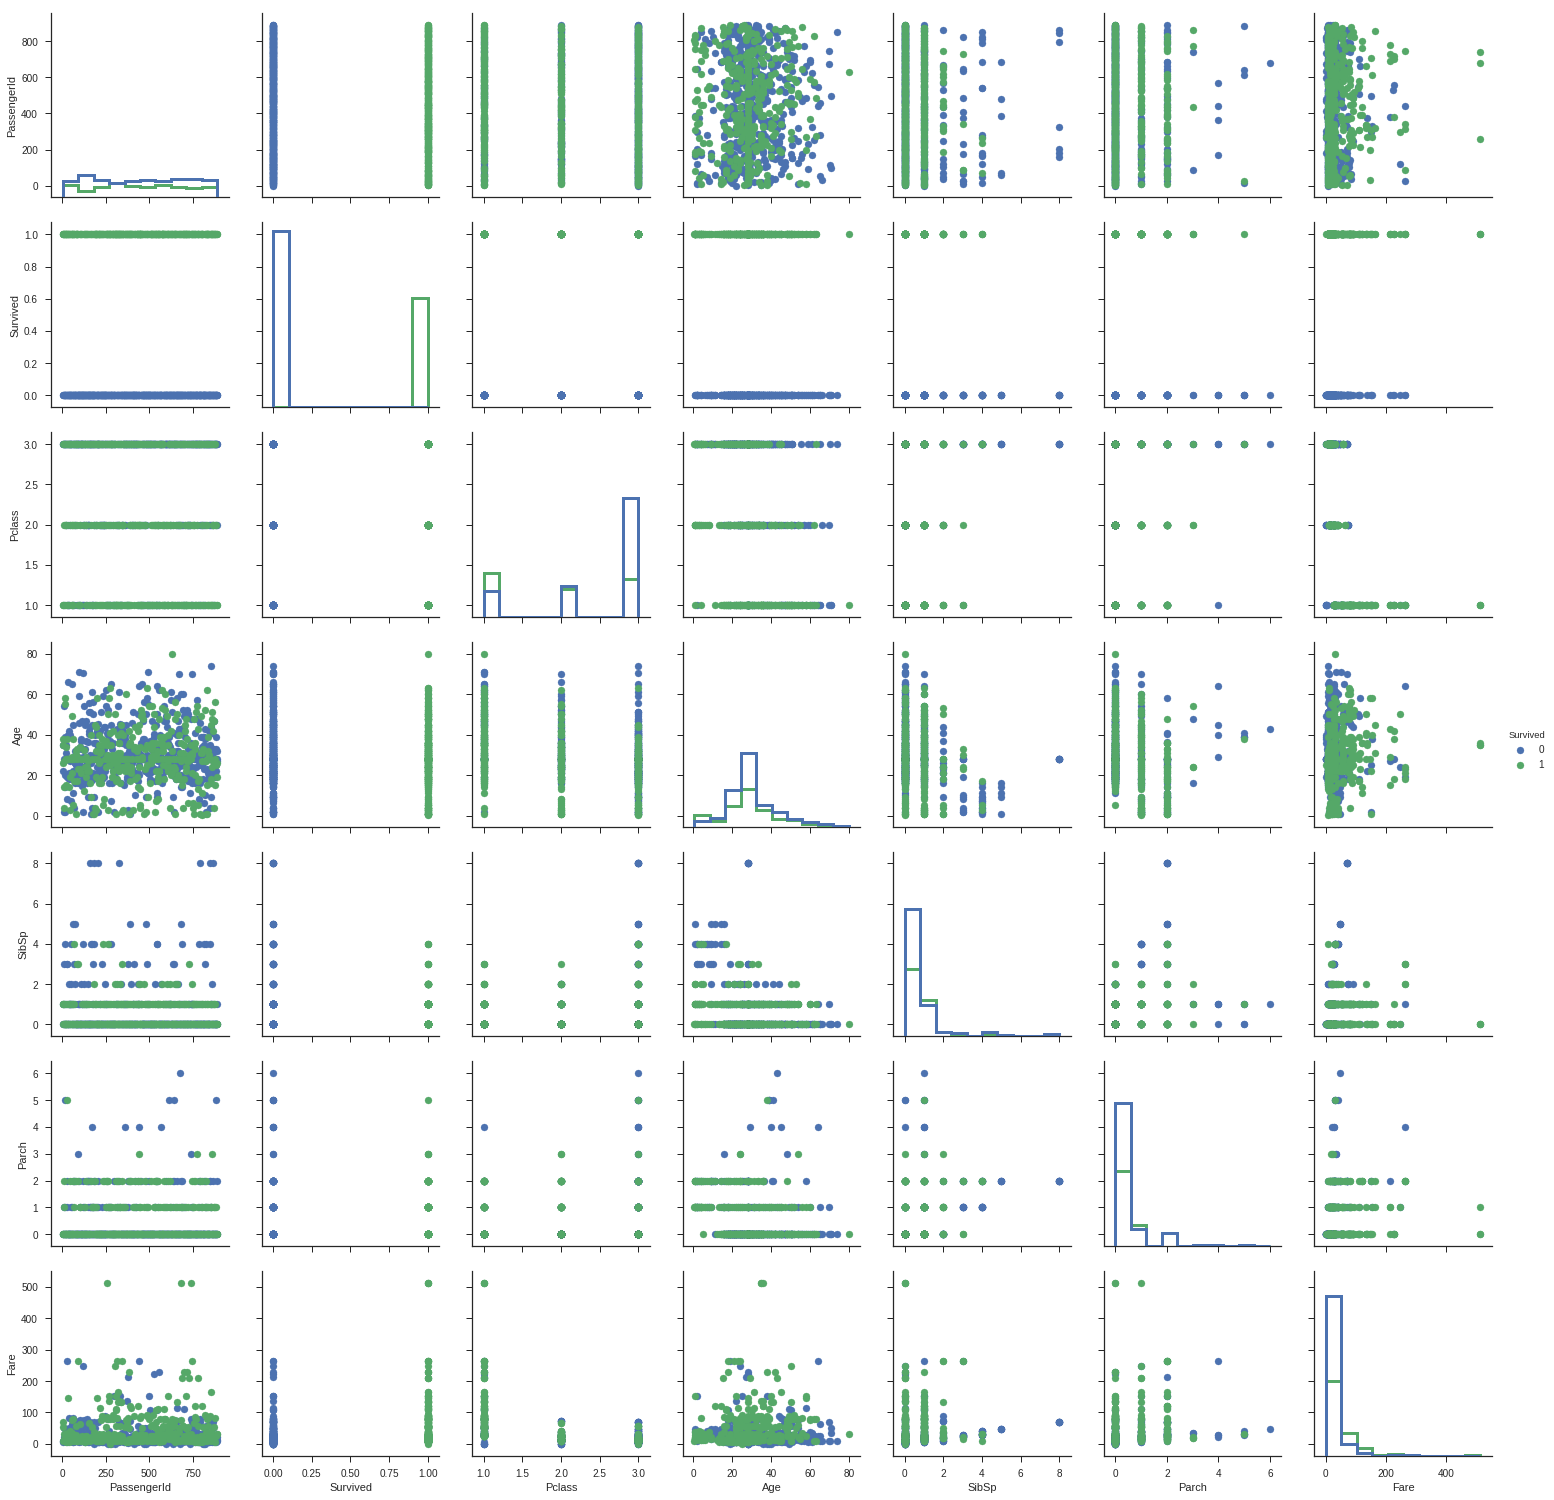

In [23]:
b = sns.PairGrid(titanic,hue='Survived',size=3,aspect=1)
b = b.map_diag(plt.hist,histtype='step',linewidth=3)
b = b.map_offdiag(plt.scatter)
b = b.add_legend()

In [24]:
# this plot shows the survival of the people in each category

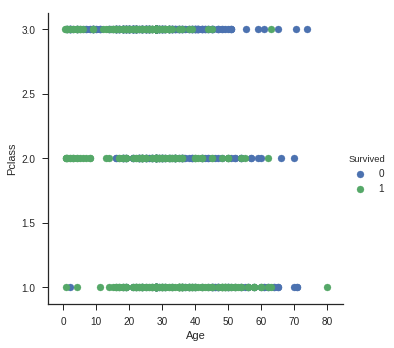

In [25]:
a=sns.FacetGrid(titanic,hue='Survived',size=5,aspect=1)
a=a.map(plt.scatter,'Age','Pclass')
a=a.add_legend()

In [26]:
# this plot shows that no of people in the first,second and third classes are alive

In [27]:
corr=titanic.corr()
corr

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096688  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096688  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

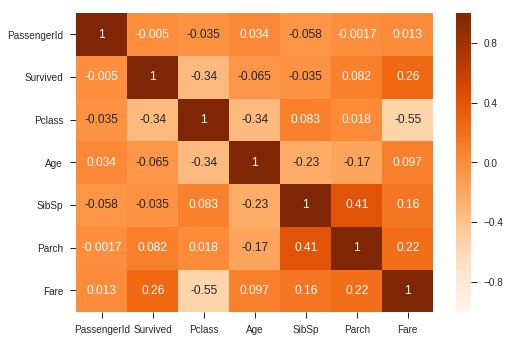

In [86]:
x=sns.heatmap(corr,annot=True,cmap = 'Oranges')
plt.show()
# this plot shows the correlation between each feature with other

In [29]:
# splitting the data into training and test set

import sklearn.model_selection as ms
rn_train_set, rn_test_set = ms.train_test_split(titanic1, test_size = 0.1, random_state=42)  
rn_train_set.shape
rn_test_set.shape

(801, 9)

(90, 9)

# Transform the data

In [30]:
# Split the training data set into features and labels

features = rn_train_set.drop('Survived', axis=1)
labels = rn_train_set.Survived.copy()
features.shape
labels.shape

(801, 8)

(801,)

In [66]:
titanic1.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S

In [70]:
numeric_cols =list(titanic1.drop(['Sex','Embarked'],axis=1))
categorical_cols = ['Sex','Embarked']

# here numerical data and categorical data are separted
# categorical data can be repesented in numbers using Encoder

In [44]:
%run 'CategoricalEncoder.py.ipynb'
%run 'class.py.ipynb'
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler

numeric_cols_pipeline = Pipeline([('selector', ColumnSelector(numeric_cols)),
                                  ('standard_scaler', StandardScaler())
                                 ])

categorical_cols_pipeline = Pipeline([('selector', ColumnSelector(categorical_cols)),
                                      ('encoder', CategoricalEncoder(encoding='onehot-dense'))
                                     ])

full_pipeline = FeatureUnion(transformer_list=[('numeric_pipeline', numeric_cols_pipeline),
                                               ('categorical_pipeline', categorical_cols_pipeline)
                                              ])

In [80]:
titanic_transformed=full_pipeline.fit_transform(rn_train_set)
titanic_transformed

array([[-1.0970167 ,  1.27186755,  0.82096936, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.37025172, -0.78624539,  0.82096936, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.69804573, -0.78624539, -1.59222865, ...,  0.        ,
         1.        ,  0.        ],
       ..., 
       [ 1.61508849, -0.78624539,  0.82096936, ...,  0.        ,
         1.        ,  0.        ],
       [-0.0433931 ,  1.27186755, -1.59222865, ...,  0.        ,
         1.        ,  0.        ],
       [-1.3428622 , -0.78624539, -1.59222865, ...,  0.        ,
         1.        ,  0.        ]])